In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Uncleaned_DS_jobs.csv')

# **LIGHT CLEANING**

In [ ]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


###1.  **Standardizing Column Names**

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [ ]:
df.drop(columns = ['index'], inplace=True)

In [ ]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### 2. **Removing Obvious Inconsistencies from each Column**

In [ ]:
df['job']=df['job_title'].str.lower().str.replace('(','').str.replace(')','').str.replace('.','').str.extract('((?:\w+\s?)+)')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2212855345.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['job']=df['job_title'].str.lower().str.replace('(','').str.replace(')','').str.replace('.','').str.extract('((?:\w+\s?)+)')


In [ ]:
df['job'] = df['job'].str.strip()
df['job'].unique()

array(['sr data scientist', 'data scientist', 'staff data scientist',
       'data modeler', 'experienced data scientist', 'data analyst ii',
       'medical lab scientist', 'human factors scientist',
       'business intelligence analyst i', 'senior research statistician',
       'data engineer', 'associate data scientist',
       'business intelligence analyst', 'senior analyst', 'data analyst',
       'machine learning engineer', 'data analyst i', 'scientist',
       'computational scientist', 'senior data scientist',
       'jr data engineer', 'e', 'data analytics engineer',
       'product data scientist', 'global data analyst', 'data',
       'data engineer remote', 'principal data scientist',
       'business data analyst', 'purification scientist',
       'data scientist 3 718', 'real world science',
       'data science manager', 'patient safety',
       'applied technology researcher', 'health data scientist',
       'sr data engineer sr bi developer', 'lead data scientist',


In [ ]:
df.drop(columns=['job_title'],inplace=True)

In [ ]:
df['salary_in_grands'] = df['salary_estimate'].str.extract('([$]\d{3,4}[K].[$]\d{3,4}[K])')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2366504883.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['salary_in_grands'] = df['salary_estimate'].str.extract('([$]\d{3,4}[K].[$]\d{3,4}[K])')


In [ ]:
df['salary_in_grands']=df['salary_in_grands'].str.strip().str.replace('$','').str.replace('K','')

In [ ]:
df.drop(columns=['salary_estimate'], inplace=True)

In [ ]:
df['company_name'] = df['company_name'].str.split('\n').str.get(0)

In [ ]:
df['company_name'] = df['company_name'].str.strip().str.lower()

In [ ]:
df['city'] = df['location'].str.lower().str.split(',').str.get(0)

In [ ]:
df['state'] = df['location'].str.lower().str.split(',').str.get(1)

In [ ]:
df.drop(columns=['location'], inplace=True)

In [ ]:
df['employees']=df['size'].str.extract('(\d+\sto\s\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-598541193.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['employees']=df['size'].str.extract('(\d+\sto\s\d+)')


In [ ]:
df['employees'] = df['employees'].str.replace(' ','').str.replace('to','-')

In [ ]:
df.drop(columns=['size'],inplace=True)

In [ ]:
def f1(a):
  if a < 0:
    return np.nan
  else:
    return a

df['founded']=df['founded'].apply(f1)

In [ ]:
df['rating'] = df['rating'].apply(f1)

In [ ]:
def f2 (s):
  if s == 'unknown' or s == '-1':
    return np.nan
  else:
    return s

df['type_of_ownership'] = df['type_of_ownership'].str.strip().str.lower()
df['type_of_ownership'] = df['type_of_ownership'].apply(f2)

In [ ]:
def f3 (s):
  if s == '-1':
    return np.nan
  else:
    return s

df['industry'] = df['industry'].str.strip().str.lower()
df['industry'] = df['industry'].apply(f3)
df['headquarters'] = df['headquarters'].apply(f3)

In [ ]:
def f4 (s):
  if s== '-1':
    return np.nan
  else:
    return s

df['sector'] = df['sector'].str.strip().str.lower()
df['sector'] = df['sector'].apply(f4)

In [ ]:
df['revenue'] = df['revenue'].str.replace('$','')
df['revenue'].unique()

array(['Unknown / Non-Applicable', '1 to 2 billion (USD)',
       '100 to 500 million (USD)', '10+ billion (USD)',
       '2 to 5 billion (USD)', '500 million to 1 billion (USD)',
       '5 to 10 billion (USD)', '10 to 25 million (USD)',
       '25 to 50 million (USD)', '50 to 100 million (USD)',
       '1 to 5 million (USD)', '5 to 10 million (USD)',
       'Less than 1 million (USD)', '-1'], dtype=object)

In [ ]:
def func (s):
  if s == '10+ billion (USD)':
    return '10 + billion'
  elif s == '500 million to 1 billion (USD)':
    return '0.5 to 1 billion'
  else:
    return s

df['revenue'] = df['revenue'].apply(func)

In [ ]:
def func2 (s):
  if 'billion' in s:
    l = s.split(' ')
    l2 = []
    for i in l:
      if i.isnumeric():
        a = int(i)*1000
        l2.append(a)
        l2.append('to')
    s_new = ''
    for i in l2:
        s_new = s_new + ' ' + str(i)
    return s_new
  else:
    return s

df['revenue'] = df['revenue'].apply(func2)

In [ ]:
df['revenue_in_million'] = df['revenue'].str.extract('(\d+\sto\s\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-483963196.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['revenue_in_million'] = df['revenue'].str.extract('(\d+\sto\s\d+)')


In [ ]:
df.drop(columns = ['revenue'], inplace=True)

In [ ]:
df['competitors'] = df['competitors'].str.strip().str.lower()

def func3 (s):
  if s == '-1':
    return np.nan
  else:
    return s

df['competitors'] = df['competitors'].apply(func3)

### 3. **Dropping Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

'''
company_name
job
city
'''

'\ncompany_name\njob\ncity\n'

In [ ]:
df.drop_duplicates(subset = ['company_name','job','city','salary_in_grands'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 671
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_description     588 non-null    object 
 1   rating              552 non-null    float64
 2   company_name        588 non-null    object 
 3   headquarters        569 non-null    object 
 4   founded             488 non-null    float64
 5   type_of_ownership   569 non-null    object 
 6   industry            532 non-null    object 
 7   sector              532 non-null    object 
 8   competitors         154 non-null    object 
 9   job                 588 non-null    object 
 10  salary_in_grands    251 non-null    object 
 11  city                588 non-null    object 
 12  state               569 non-null    object 
 13  employees           484 non-null    object 
 14  revenue_in_million  296 non-null    object 
dtypes: float64(2), object(13)
memory usage: 73.5+ KB


In [ ]:
df.head()

,job_description,rating,company_name,headquarters,founded,type_of_ownership,industry,sector,competitors,job,salary_in_grands,city,state,employees,revenue_in_million
0,Description\n\nThe Senior Data Scientist is re...,3.1,healthfirst,"New York, NY",1993.0,nonprofit organization,insurance carriers,insurance,"emblemhealth, unitedhealth group, aetna",sr data scientist,137-171,new york,ny,1001-5000,NaN
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,mantech,"Herndon, VA",1968.0,company - public,research & development,business services,NaN,data scientist,137-171,chantilly,va,5001-10000,1000 to 2000
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,analysis group,"Boston, MA",1981.0,private practice / firm,consulting,business services,NaN,data scientist,137-171,boston,ma,1001-5000,100 to 500
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,inficon,"Bad Ragaz, Switzerland",2000.0,company - public,electrical & electronic manufacturing,manufacturing,"mks instruments, pfeiffer vacuum, agilent tech...",data scientist,137-171,newton,ma,501-1000,100 to 500
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,affinity solutions,"New York, NY",1998.0,company - private,advertising & marketing,business services,"commerce signals, cardlytics, yodlee",data scientist,137-171,new york,ny,51-200,NaN


### 4. **Fixing Dtypes**

In [ ]:
df['founded'] = df['founded'].astype('Int64')

## **EDA UNIVAR**

### 1. **Numerical Columns**


Missing values % in rating:
6.122448979591836

Stats for rating
count    552.000000
mean       3.866486
std        0.611520
min        2.000000
25%        3.475000
50%        3.800000
75%        4.300000
max        5.000000
Name: rating, dtype: float64

Skewness:
0.014980525045125453

Distribution:


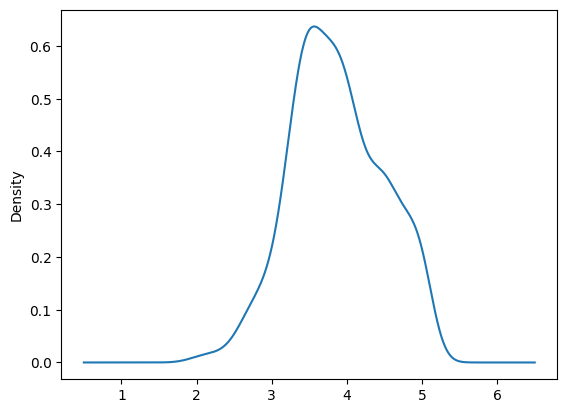


min_lim= 2.0319262442144432

max_lim= 5.701044770278312

% of outliers:
1.0

Missing values % in founded:
17.006802721088434

Stats for founded
count          488.0
mean     1984.063525
std        40.556879
min           1781.0
25%           1974.0
50%           1999.0
75%           2010.0
max           2019.0
Name: founded, dtype: Float64

Skewness:
-2.2316576481481243

Distribution:


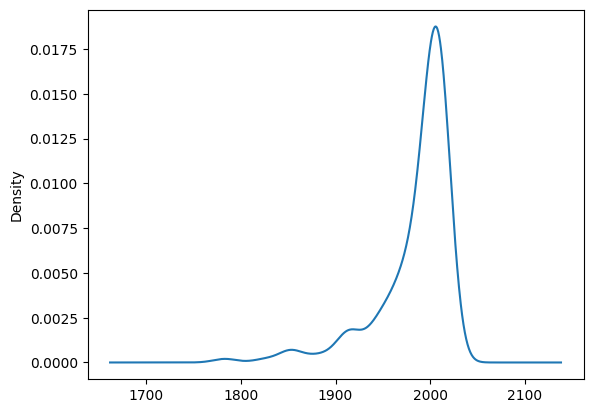


min_lim= 1920.0

max_lim= 2064.0

% of outliers:
9.221311475409836


In [ ]:
num_cols = ['rating', 'founded']

for col in num_cols:
  print(f'\nMissing values % in {col}:')
  print(df[col].isnull().mean()*100)
  print(f'\nStats for {col}')
  print(df[col].describe())
  print('\nSkewness:')
  print(df[col].skew())
  print('\nDistribution:')
  df[col].plot(kind='kde')
  plt.show()
  if (df[col].skew()>-1 and df[col].skew()<1):
    min = df[col].mean() - 3*df[col].std()
    max = df[col].mean() + 3*df[col].std()
    print('\nmin_lim=',min)
    print('\nmax_lim=',max)
    print('\n% of outliers:')
    print(df[(df[col]>= min) | (df[col]<=max)][col].count()/df[col].count())
  else:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    min = q1 - 1.5*iqr
    max = q3 + 1.5*iqr
    print('\nmin_lim=',min)
    print('\nmax_lim=',max)
    print('\n% of outliers:')
    print(df[(df[col]< min) | (df[col]>max)][col].count()*100.0/df[col].count())


### 2. **Categorical Columns**


% of missing values in company_name :
0.0

Unique number of categories for company_name :
432

Top contributors for company_name:
company_name
other                                     84.693878
maxar technologies                         1.870748
tempus labs                                1.530612
astrazeneca                                1.360544
klaviyo                                    1.190476
novetta                                    1.020408
southwest research institute               0.850340
autodesk                                   0.680272
kingfisher systems                         0.680272
novartis                                   0.510204
affinity solutions                         0.510204
analysis group                             0.510204
spectrum communications and consulting     0.510204
triplebyte                                 0.510204
buckman                                    0.510204
gutcheck                                   0.510204
mars                    

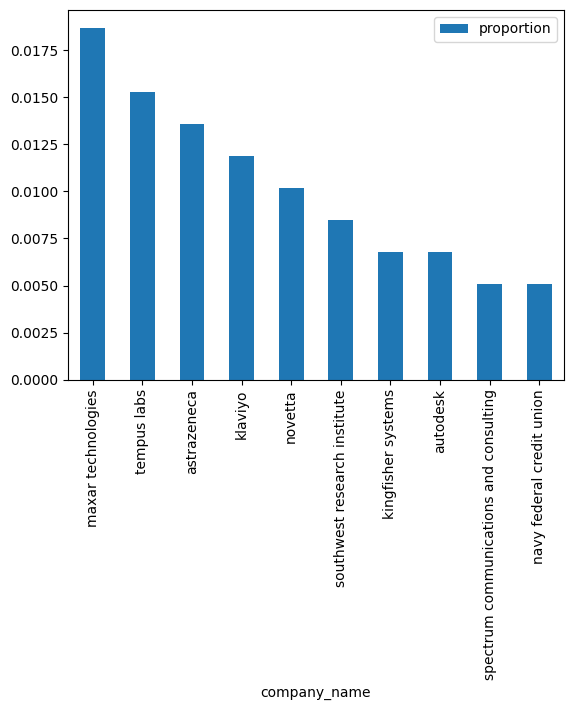


% of missing values in headquarters :
3.231292517006803

Unique number of categories for headquarters :
228

Top contributors for headquarters:
headquarters
other                        63.605442
New York, NY                  5.102041
San Francisco, CA             4.421769
Chicago, IL                   3.401361
Boston, MA                    3.061224
Reston, VA                    2.040816
Mc Lean, VA                   2.040816
Westminster, CO               1.870748
Cambridge, MA                 1.700680
Vienna, VA                    1.360544
Cambridge, United Kingdom     1.360544
Bedford, MA                   1.190476
Washington, DC                1.190476
Arlington, VA                 1.190476
Denver, CO                    1.020408
Chantilly, VA                 1.020408
San Jose, CA                  1.020408
Saint Louis, MO               0.850340
Princeton, NJ                 0.850340
Fairfax, VA                   0.850340
San Antonio, TX               0.850340
Name: proportion, dtype

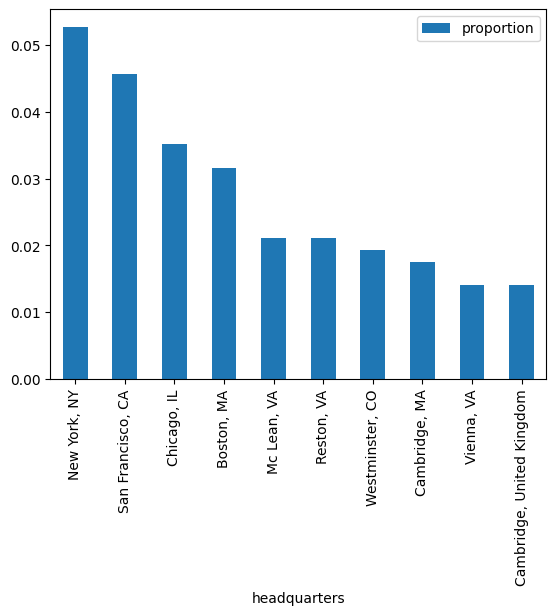


% of missing values in type_of_ownership :
3.231292517006803

Unique number of categories for type_of_ownership :
11

Top contributors for type_of_ownership:
type_of_ownership
company - private                 60.204082
company - public                  22.789116
nonprofit organization             5.782313
subsidiary or business segment     3.911565
other                              3.231293
government                         1.530612
other organization                 0.850340
private practice / firm            0.680272
contract                           0.340136
college / university               0.340136
self-employed                      0.170068
hospital                           0.170068
Name: proportion, dtype: float64


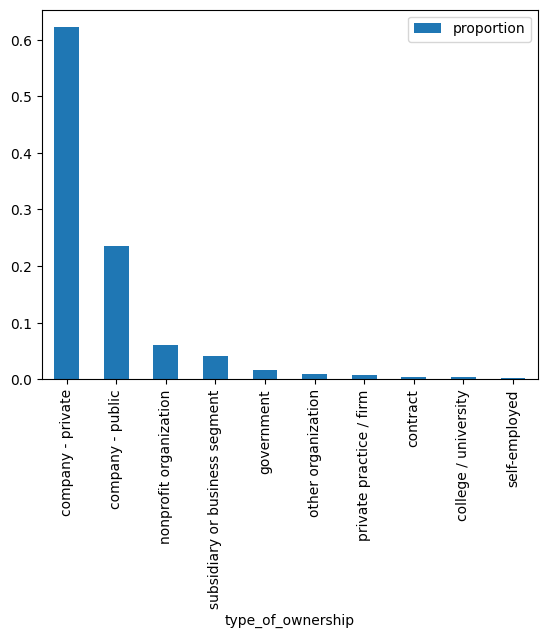


% of missing values in industry :
9.523809523809524

Unique number of categories for industry :
57

Top contributors for industry:
industry
other                                      20.748299
biotech & pharmaceuticals                   9.863946
computer hardware & software                8.333333
it services                                 8.333333
aerospace & defense                         7.142857
enterprise software & network solutions     6.972789
consulting                                  6.292517
staffing & outsourcing                      5.272109
insurance carriers                          4.081633
internet                                    4.081633
advertising & marketing                     3.571429
health care services & hospitals            3.401361
federal agencies                            2.551020
research & development                      2.210884
investment banking & asset management       1.870748
lending                                     1.190476
banks & cre

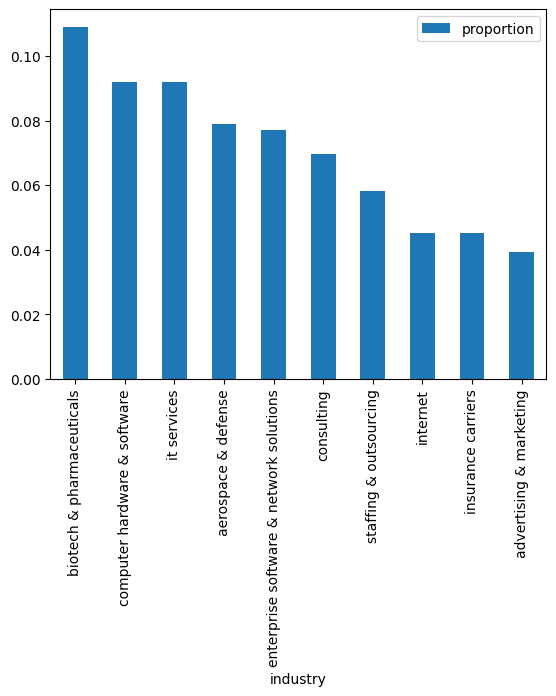


% of missing values in sector :
9.523809523809524

Unique number of categories for sector :
22

Top contributors for sector:
sector
information technology          27.721088
business services               18.367347
biotech & pharmaceuticals        9.863946
other                            9.863946
aerospace & defense              7.142857
finance                          4.931973
insurance                        4.761905
manufacturing                    3.401361
health care                      3.401361
government                       2.721088
oil, gas, energy & utilities     1.360544
retail                           1.190476
transportation & logistics       1.020408
telecommunications               1.020408
media                            0.850340
real estate                      0.510204
travel & tourism                 0.510204
agriculture & forestry           0.340136
education                        0.340136
accounting & legal               0.340136
consumer services          

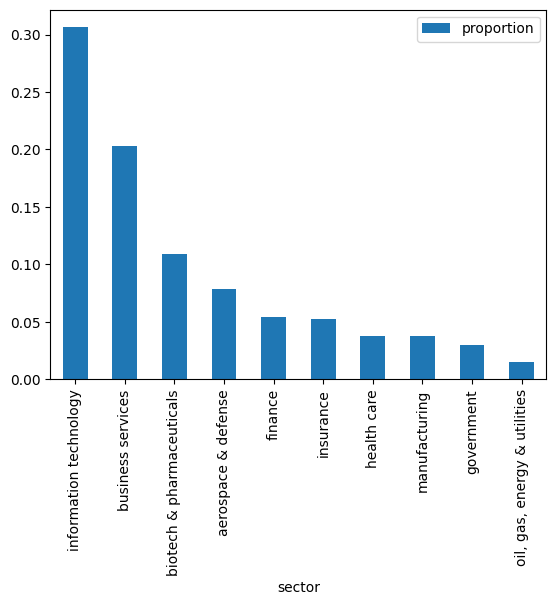


% of missing values in competitors :
73.80952380952381

Unique number of categories for competitors :
107

Top contributors for competitors:
competitors
other                                                                                           90.306122
roche, glaxosmithkline, novartis                                                                 1.360544
leidos, caci international, booz allen hamilton                                                  1.020408
los alamos national laboratory, battelle, sri international                                      0.850340
commerce signals, cardlytics, yodlee                                                             0.510204
nielsen, zappi, surveymonkey                                                                     0.510204
battelle, general atomics, saic                                                                  0.510204
oak ridge national laboratory, national renewable energy lab, los alamos national laboratory     0.51020

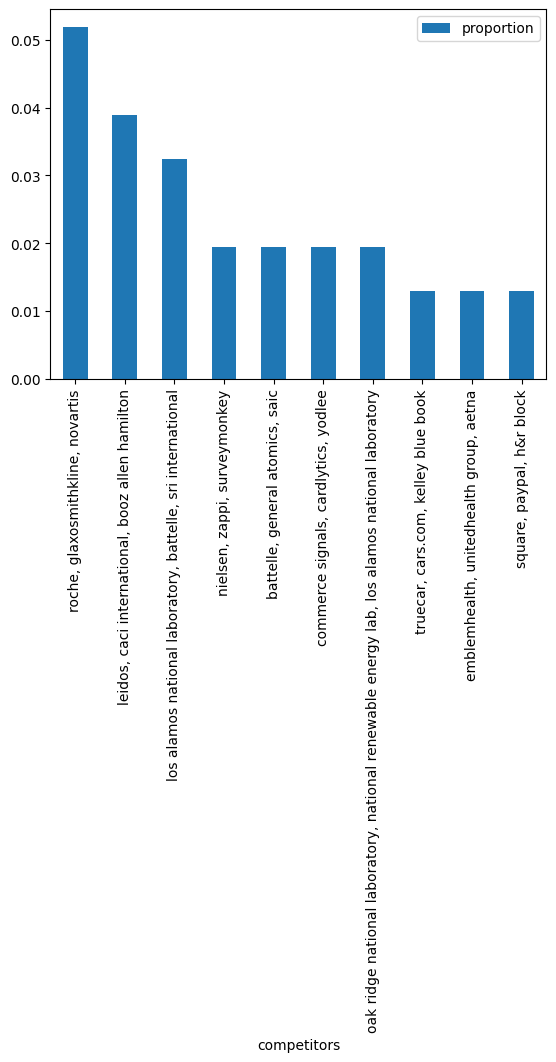


% of missing values in job :
0.0

Unique number of categories for job :
125

Top contributors for job:
job
data scientist                       55.782313
other                                22.619048
data engineer                         4.421769
senior data scientist                 3.231293
machine learning engineer             2.551020
data analyst                          2.380952
scientist                             1.190476
senior data analyst                   1.020408
sr data scientist                     0.850340
senior data engineer                  0.680272
staff data scientist                  0.510204
principal data scientist              0.510204
lead data scientist                   0.510204
analytics                             0.510204
data science software engineer        0.510204
data scientist ts                     0.510204
analytics manager                     0.510204
engineer                              0.510204
senior machine learning scientist     0.510204

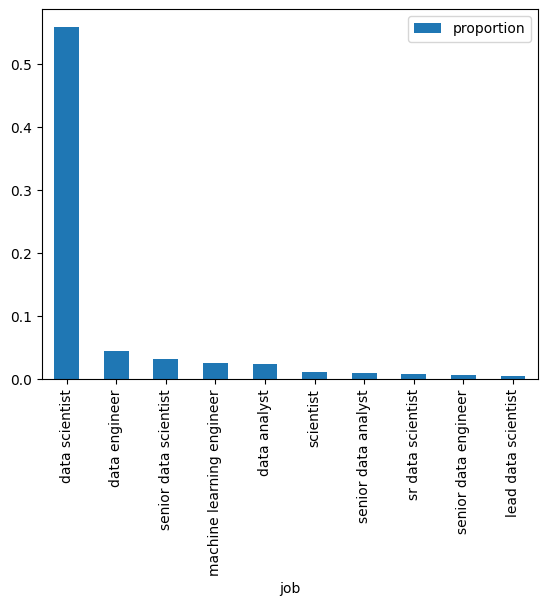


% of missing values in salary_in_grands :
57.31292517006803

Unique number of categories for salary_in_grands :
12

Top contributors for salary_in_grands:
salary_in_grands
other      57.312925
137-171     5.102041
128-201     3.571429
124-198     3.571429
112-116     3.571429
138-158     3.571429
212-331     3.571429
101-165     3.401361
141-225     3.401361
145-225     3.401361
110-163     3.401361
105-167     3.401361
122-146     2.721088
Name: proportion, dtype: float64


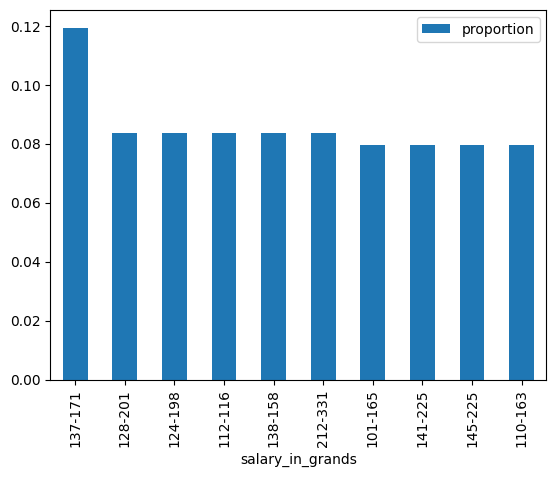


% of missing values in city :
0.0

Unique number of categories for city :
204

Top contributors for city:
city
other            52.210884
san francisco     7.993197
new york          7.312925
washington        4.081633
boston            3.571429
chicago           3.401361
herndon           3.231293
cambridge         2.721088
mclean            2.040816
chantilly         1.700680
united states     1.700680
santa clara       1.190476
reston            1.190476
atlanta           1.020408
saint louis       1.020408
san diego         1.020408
redwood city      1.020408
cincinnati        1.020408
palo alto         0.850340
gaithersburg      0.850340
denver            0.850340
Name: proportion, dtype: float64


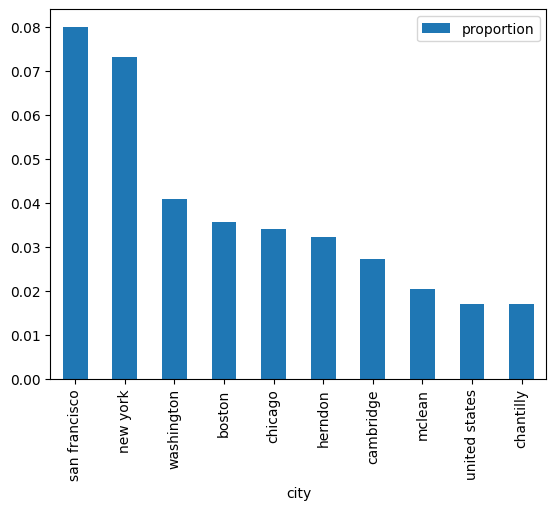


% of missing values in state :
3.231292517006803

Unique number of categories for state :
39

Top contributors for state:
state
 ca      23.129252
 va      13.945578
other    10.884354
 ma       9.353741
 ny       7.653061
 md       5.272109
 il       4.761905
 dc       3.911565
 tx       2.721088
 wa       2.380952
 oh       2.210884
 pa       1.870748
 mo       1.700680
 nj       1.700680
 co       1.530612
 nc       1.530612
 ga       1.360544
 fl       1.190476
 tn       1.190476
 wi       0.850340
 in       0.850340
Name: proportion, dtype: float64


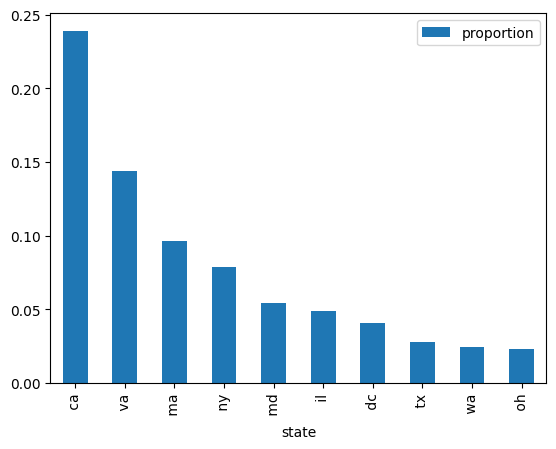


% of missing values in employees :
17.687074829931973

Unique number of categories for employees :
6


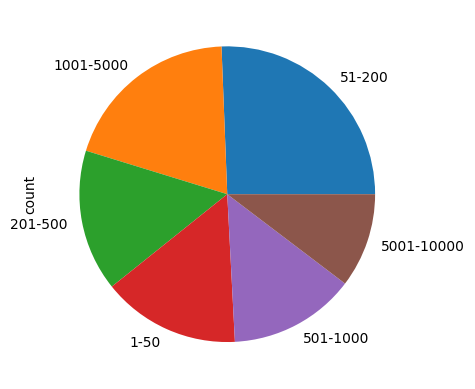

no

% of missing values in revenue_in_million :
49.65986394557823

Unique number of categories for revenue_in_million :
9


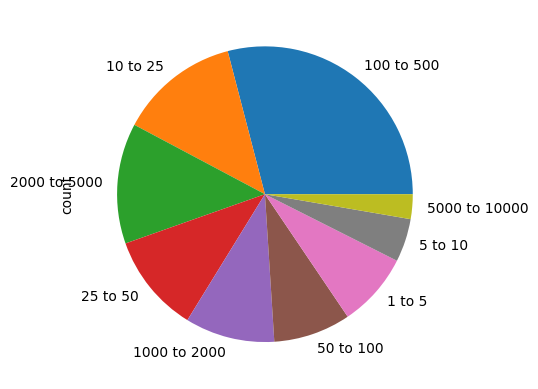

no


In [ ]:
cat_cols = ['company_name', 'headquarters', 'type_of_ownership', 'industry', 'sector', 'competitors', 'job', 'salary_in_grands', 'city', 'state', 'employees', 'revenue_in_million']

for col in cat_cols:
  print(f'\n% of missing values in {col} :')
  print(df[col].isnull().mean()*100)
  print(f'\nUnique number of categories for {col} :')
  print(df[col].nunique())
  if df[col].nunique() > 10:
    print(f'\nTop contributors for {col}:')
    t_df = df[col].value_counts(normalize=True).nlargest(20)
    d_df = df[col].apply(lambda x: x if x in t_df else 'other')
    print(d_df.value_counts(normalize=True)*100)
    temp_df = df[col].value_counts(normalize=True).nlargest(10).reset_index()
    temp_df.plot(x=col, y = 'proportion' , kind = 'bar')
    plt.show()
  else:
    temp_df = df[col].value_counts()
    temp_df.plot(kind = 'pie')
    plt.show()
    print('no')

# **HEAVY CLEANING**

### 1. **Removing Inconsitencies in Categorical Column**

In [ ]:
map = {'other organization': 'other'}

df['type_of_ownership'].replace(map, inplace=True)

/tmp/ipython-input-161200546.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type_of_ownership'].replace(map, inplace=True)


In [ ]:
map = {'sr data scientist': 'senior data scientist'}

df['job'].replace(map, inplace=True)

/tmp/ipython-input-388749461.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace(map, inplace=True)


### 2. **Handling Missing Values**

In [ ]:
for col in num_cols:
  print(f'\nmissing value % in {col}:')
  print(df[col].isnull().mean()*100)
  print(f'\nskewness of {col}:')
  print(df[col].skew())


missing value % in rating:
6.122448979591836

skewness of rating:
0.014980525045125453

missing value % in founded:
17.006802721088434

skewness of founded:
-2.2316576481481243


In [ ]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

In [ ]:
df['founded'].fillna(df['founded'].median(), inplace=True)

In [ ]:
for col in cat_cols:
  print(f'\nmissing value % in {col}:')
  print(df[col].isnull().mean()*100)
  if df[col].isnull().mean()*100.0 <= 10:
    df[col].fillna(df[col].mode()[0],inplace=True)
  elif df[col].isnull().mean()*100 > 10 and df[col].isnull().mean()*100 <= 30:
    df[col].fillna('missing', inplace=True)
  else:
    df.drop(columns = [col], inplace=True)


missing value % in company_name:
0.0

missing value % in headquarters:
3.231292517006803

missing value % in type_of_ownership:
3.231292517006803

missing value % in industry:
9.523809523809524

missing value % in sector:
9.523809523809524

missing value % in competitors:
73.80952380952381

missing value % in job:
0.0

missing value % in salary_in_grands:
57.31292517006803

missing value % in city:
0.0

missing value % in state:
3.231292517006803

missing value % in employees:
17.687074829931973

missing value % in revenue_in_million:
49.65986394557823


/tmp/ipython-input-3456071376.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
/tmp/ipython-input-3456071376.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isnull().mean()

,0
job_description,0.0
rating,0.0
company_name,0.0
headquarters,0.0
founded,0.0
type_of_ownership,0.0
industry,0.0
sector,0.0
job,0.0
city,0.0
